In [1]:
from measurement import get_DYG14, get_DYG15, set_camera, set_background

   
# https://myhdf5.hdfgroup.org
save_image_location = "/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/"
DYG14 = get_DYG14()
DYG15 = get_DYG15()

# stop windoing on charge
DYG14.target_charge = None
DYG15.target_charge = None

DYG14.save_image_location = save_image_location
DYG15.save_image_location = save_image_location


setting camera DYG15
192.168.2.139
ip address already set
starting acquisition
please shutter beam


please un-shutter beam


background file: /home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG15_background.npy
displaying image
fitting image


AWAEPICSImageDiagnostic(screen_name='13ARV1', ip_address='192.168.2.139', alias='DYG15', array_data_suffix='image1:ArrayData', array_n_cols_suffix='image1:ArraySize0_RBV', array_n_rows_suffix='image1:ArraySize1_RBV', resolution_suffix=None, resolution=1.0, beam_shutter_pv=None, extra_pvs=[], background_file='/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG15_background.npy', save_image_location='/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/', roi=ROI(xcenter=591, ycenter=1079, xwidth=700, ywidth=700), gain=15.0, min_log_intensity=4.0, bounding_box_half_width=3.0, wait_time=1.0, n_fitting_restarts=1, visualize=True, verbose=True, return_statistics=False, threshold=0.0, target_charge=None, target_charge_pv='AWAVXI11ICT:Ch4', charge_atol=1e-10, testing=False)

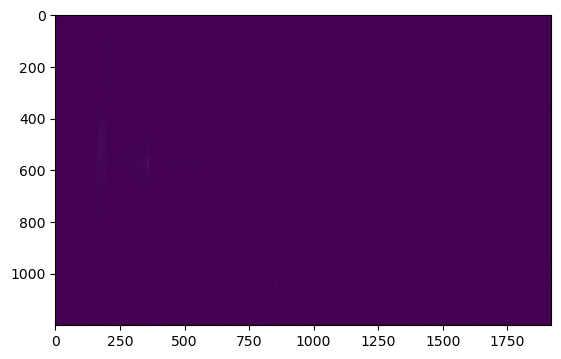

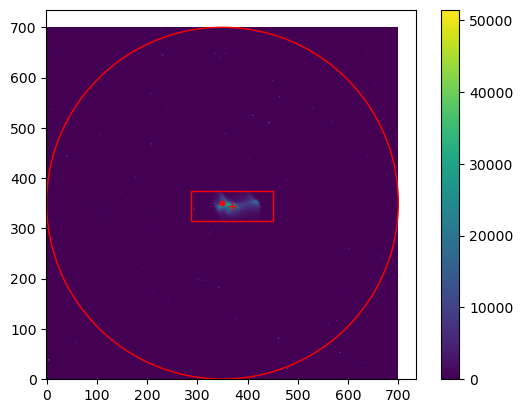

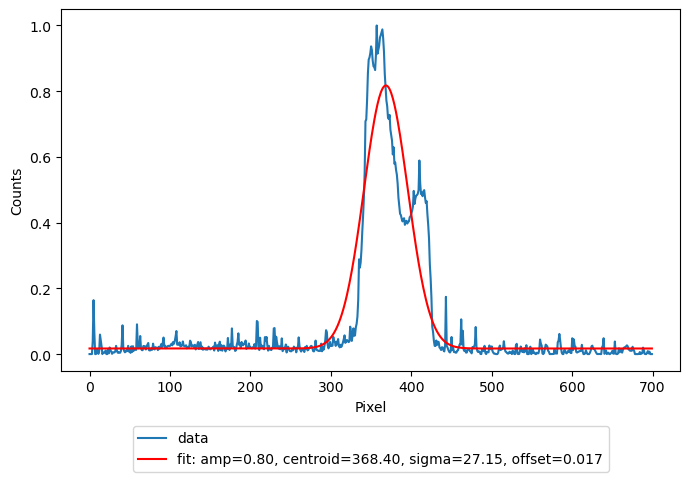

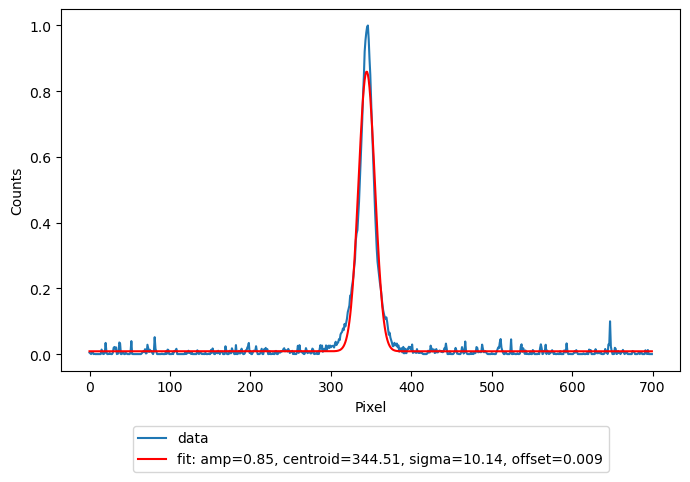

In [4]:
#set_background(DYG14)
set_background(DYG15)

#set_background(DYG15)

setting camera DYG14
192.168.2.139
setting IP address 192.168.2.111
setting gain
starting acquisition
displaying image
fitting image


{'Cx': nan,
 'Cy': nan,
 'Sx': nan,
 'Sy': nan,
 'bb_penalty': 1244.9294743757962,
 'total_intensity': 964541850.5999999,
 'log10_total_intensity': 8.98432107603416,
 'AWAVXI11ICT:Ch4': 6.816893788426628e-08}

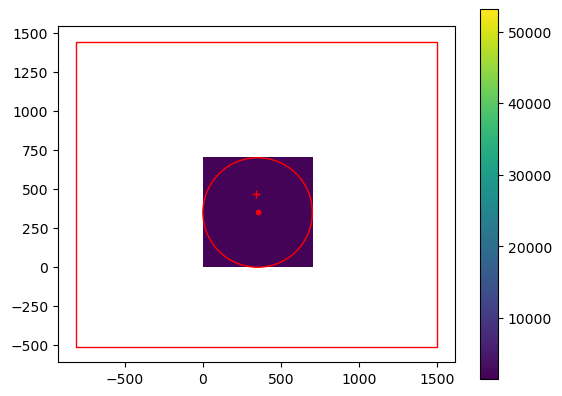

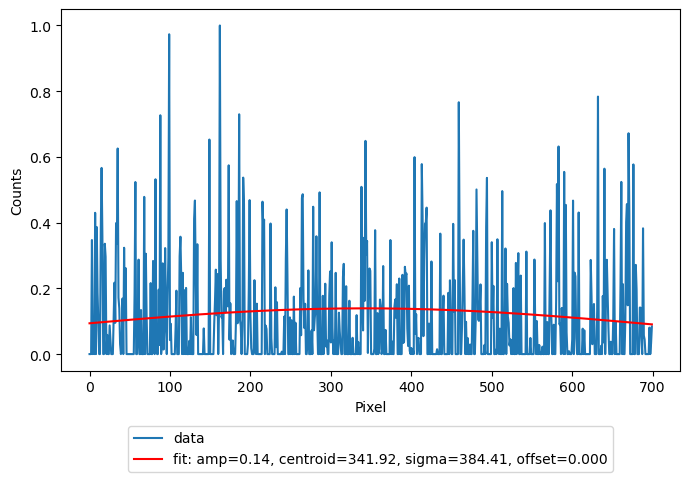

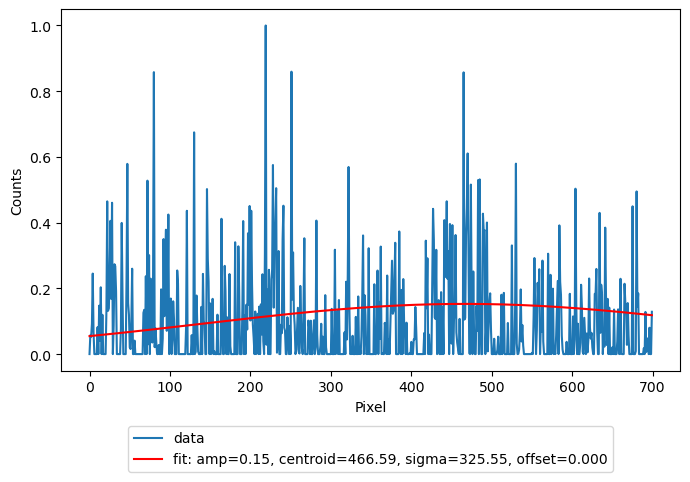

CA.Client.Exception...............................................
    Context: "awa5:5064"
    Source File: ../cac.cpp line 1237
    Current Time: Fri Jan 19 2024 10:41:54.338291787
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArrayData", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Fri Jan 19 2024 10:50:49.330182500
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize0_RBV", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Fri Jan 19 2024 10:50:49.331834813
..................................................................
CA.Client.Exception...............................................
    Context: "Ch

In [5]:
set_camera(DYG14)
DYG14.test_measurement()

setting camera DYG15
192.168.2.111
setting IP address 192.168.2.139
setting gain
starting acquisition
displaying image
fitting image


{'Cx': nan,
 'Cy': nan,
 'Sx': nan,
 'Sy': nan,
 'bb_penalty': nan,
 'total_intensity': 14897267.2,
 'log10_total_intensity': 7.173106607418163,
 'AWAVXI11ICT:Ch4': 1.8049201259092198e-08}

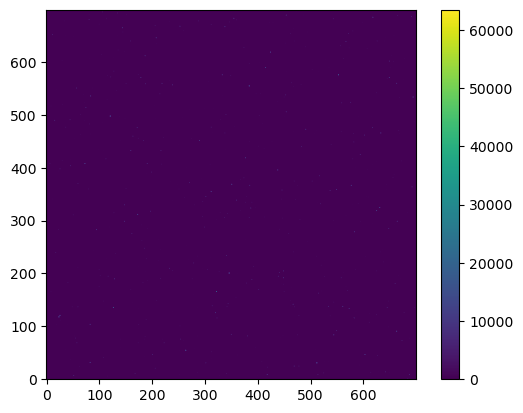

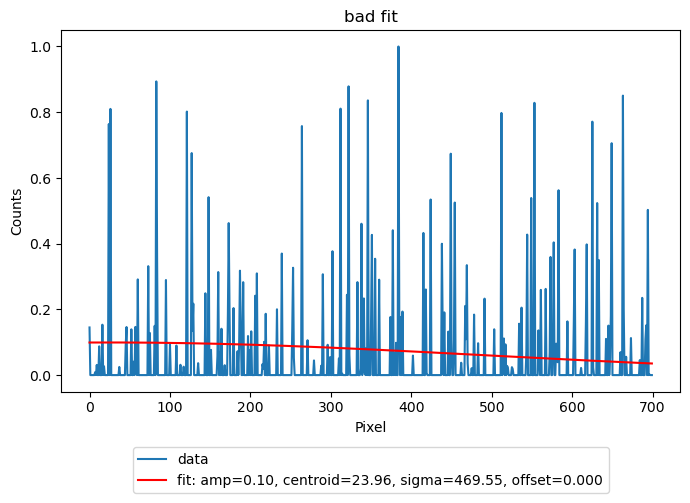

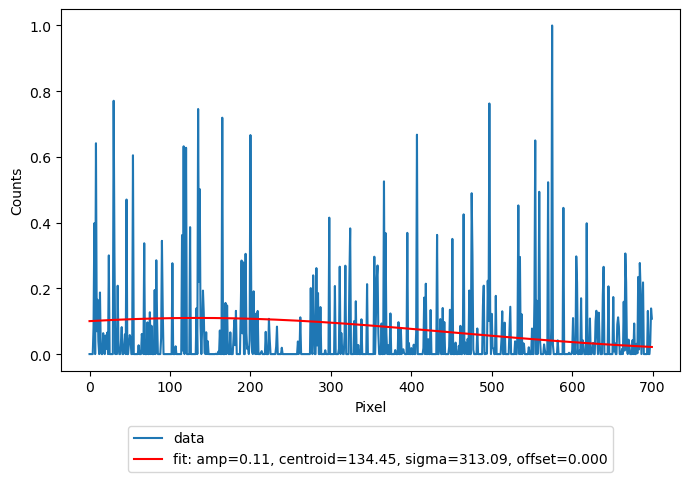

CA.Client.Exception...............................................
    Context: "awa5:5064"
    Source File: ../cac.cpp line 1237
    Current Time: Fri Jan 19 2024 13:25:17.055211683
..................................................................


In [6]:
set_camera(DYG15)
DYG15.test_measurement()

In [5]:
image = DYG15.get_processed_image()
import matplotlib.pyplot as plt
image

(array([[1984., 1936., 2144., ..., 2144., 2000., 2064.],
        [2112., 2496., 2752., ..., 1888., 2064., 1952.],
        [1968., 2480., 6640., ..., 2016., 2016., 2048.],
        ...,
        [1968., 1888., 1872., ..., 1936., 1936., 1872.],
        [2128., 1968., 2976., ..., 1920., 1792., 1792.],
        [1952., 1952., 2960., ..., 2000., 1936., 1936.]]),
 {'AWAVXI11ICT:Ch4': 4.501782295965131e-10})

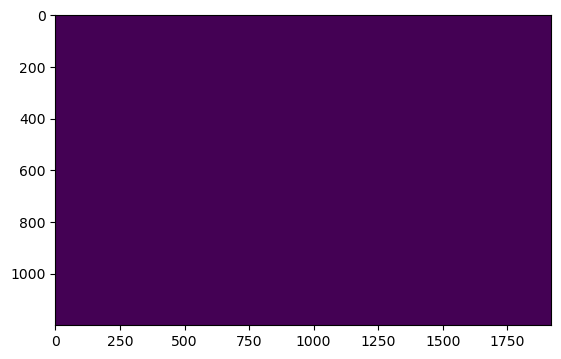

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.load("/home/awa/awa_data/01-16_6DReconstruction/DYG14_background.npy")>0)

In [54]:
from epics import caget

## Get regions of interest for AWA DYG1-4 cameras

In [63]:
result = caget("AWANIFG:ImgData")
import matplotlib.pyplot as plt
plt.imshow(result.reshape(480,640))

In [4]:
result.shape

(307200,)

In [6]:
640*480

307200

In [69]:
import sys
sys.path.append("../")
from plugins.interfaces.diagnostics import AWAFrameGrabberDiagnostic

displaying image
fitting image


{'Cx': nan,
 'Cy': nan,
 'Sx': nan,
 'Sy': nan,
 'bb_penalty': 97.99756595524656,
 'total_intensity': 21598915.0,
 'log10_total_intensity': 7.334431935347781}

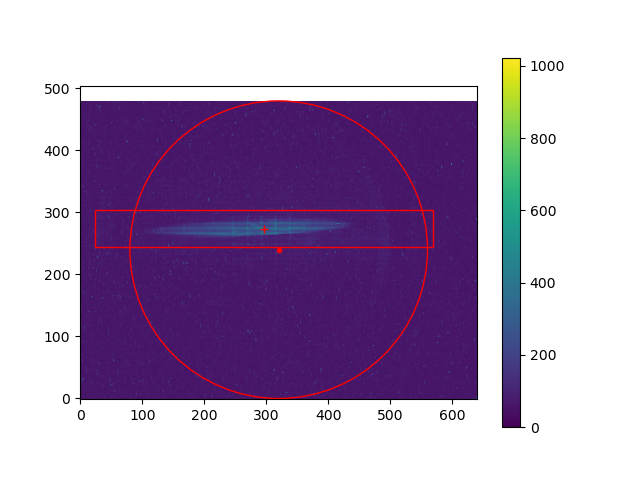

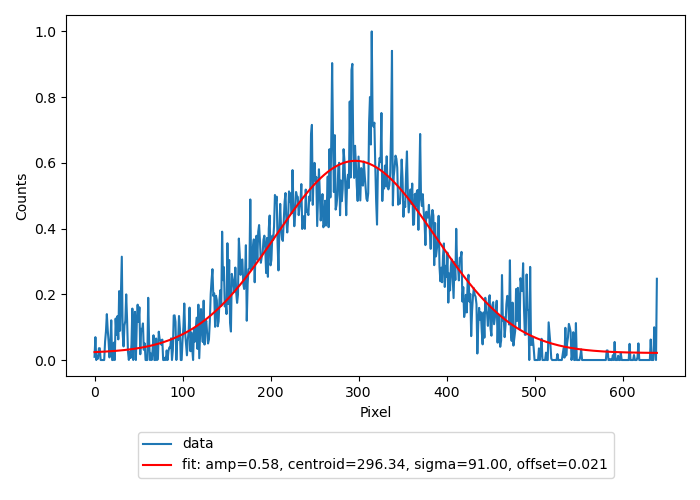

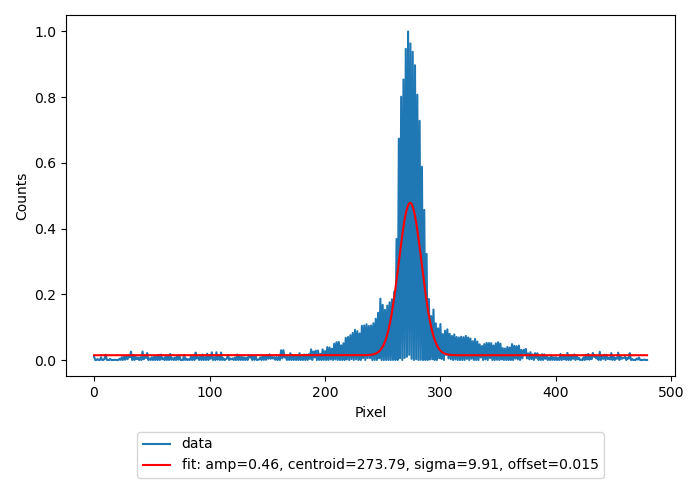

In [70]:
diagnostic = AWAFrameGrabberDiagnostic()
diagnostic.test_measurement()

In [65]:
img,_ = diagnostic.get_raw_data()

In [66]:
import matplotlib.pyplot as plt

plt.imshow(img)

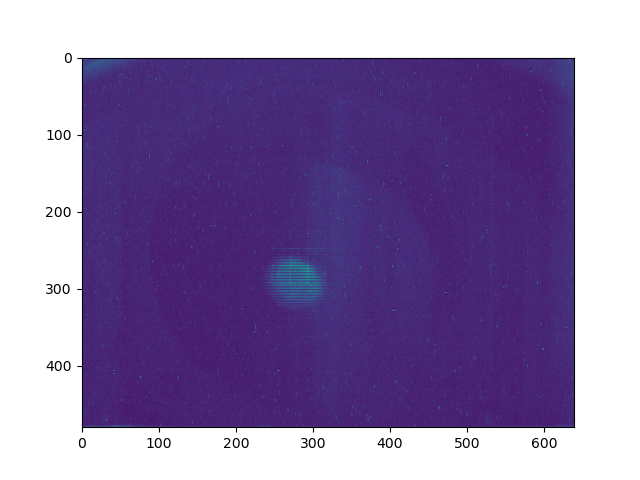

In [67]:
%matplotlib widget
from circle_detection import ScreenFinder
a = ScreenFinder(img)

In [68]:
print(a.circle.center)
print(a.circle.radius)

(293.6070723016849, 248.12799438794332)
206.9578032921999


## Test fitting w/o bounding box constraint

In [73]:
from plugins.interfaces.diagnostics import ROI
sys.path.append("../")
diagnostic = AWAFrameGrabberDiagnostic()

diagnostic.apply_bounding_box_constraint = False


displaying image
fitting image


{'Cx': 288.0012169312153,
 'Cy': 225.9902834323943,
 'Sx': 5.6105600748332245,
 'Sy': 72.93686464760079,
 'bb_penalty': 79.46807543388684,
 'total_intensity': 20921064.0,
 'log10_total_intensity': 7.320583768033579}

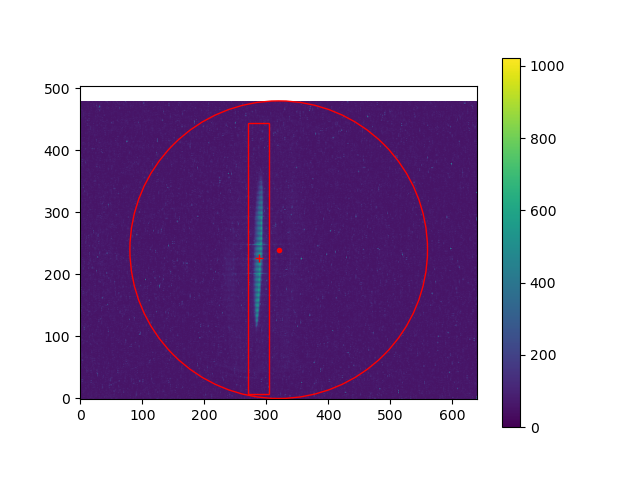

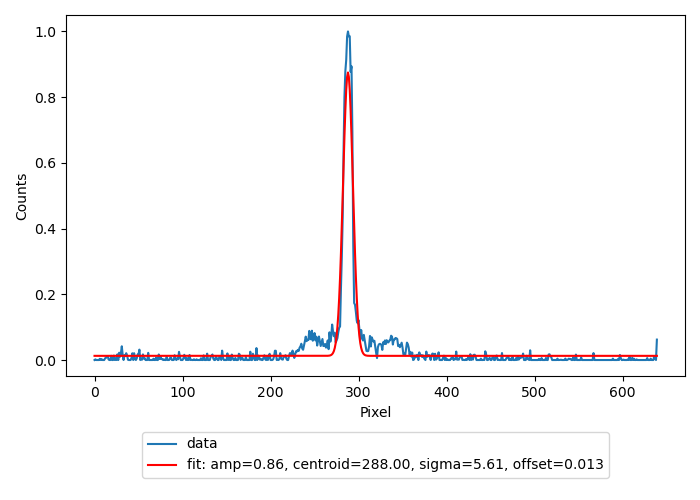

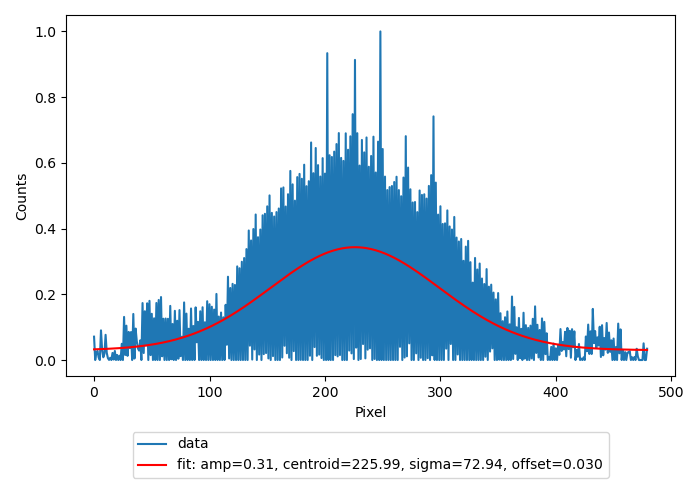

In [75]:
#Cx 295.31806458634986,
# 'Cy': 273.198371097625,
diagnostic.measure_beamsize()